# Visualisation tutorial

In the [`introductory_tutorial`](introductory_tutorial.ipynb) we ran through building structural covariance network analyses using `scona`🍪.

In this tutorial we'll cover some of the visualisation tools to communicate these results.

Click on any of the links below to jump to that section
* [Get set up](#Get-set-up) (make sure to run this section before jumping into any of the others!)
* [Visualise the degree distribution: `plot_degree`](#Visualise-the-degree-distribution%3A-%3Ccode%3Eplot_degree%3C%2Fcode%3E)
* [Report the global measures of the graph: `report_global_measures`](#Report-the-global-measures-of-the-graph%3A-%3Ccode%3Ereport_global_measures%3C%2Fcode%3E)

## Get set up

### Import the modules you need

In [1]:
import scona as scn
import scona.datasets as datasets
import numpy as np
import networkx as nx
import pandas as pd
from IPython.display import display

import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

%load_ext autoreload
%autoreload 2

### Read in the data, build a network and calculate the network metrics

If you're not sure about this step, please check out the [`introductory_tutorial`](introductory_tutorial.ipynb) notebook for more explanation.

In [2]:
# Read in sample data from the NSPN WhitakerVertes PNAS 2016 paper.
df, names, covars, centroids = datasets.NSPN_WhitakerVertes_PNAS2016.import_data()

# calculate residuals of the matrix df for the columns of names
df_res = scn.create_residuals_df(df, names, covars)

# create a correlation matrix over the columns of df_res
M = scn.create_corrmat(df_res, method='pearson')

# Initialise a weighted graph G from the correlation matrix M
G = scn.BrainNetwork(network=M, parcellation=names, centroids=centroids)

# Threshold G at cost 10 to create a binary graph with 10% as many edges as the complete graph G.
G10 = G.threshold(10)

# Create a GraphBundle object that contains the G10 graph called "real_graph"
bundleGraphs = scn.GraphBundle([G10], ["real_graph"])

# Add ten random graphs to this bundle
# (In real life you'd want more than 10 random graphs,
# but this step can take quite a long time to run so 
# for the demo we just create 10)
bundleGraphs.create_random_graphs("real_graph", 10)

        Creating 10 random graphs - may take a little while


## Visualise the degree distribution: `plot_degree`

The degree of each node is the number of edges adjacent to the node.
For example if a node is connected to four other nodes then its degree is 4.
If it is connected to 50 other nodes, its degree is 50.

Brain networks are usually ["scale-free"](https://en.wikipedia.org/wiki/Scale-free_network) which means that their degree distribution follows a power law.
You can think of them as having a "heavy tail": there are a small number of nodes that have a large number of connections.

This is in contrast to - for example - an Erdős–Rényi graph where each node is connected to the others with a set, random probability.
This graph is often called a [binomial graph](https://en.wikipedia.org/wiki/Erd%C5%91s%E2%80%93R%C3%A9nyi_model) because the probability of connections follows a binomial (Yes-No) distribution.

One of the first things to check for the structural covariance network analysis with `scona` is that our degree distribution shows this pattern.

### Look at the data

The degree distribution is already saved in the `G10` graph object.
But we'll just spend a few moments showing how you can access that information.

You can make a dictionary of the node ids (the dictionary key) and their degree (the dictionary value).

In [3]:
degrees = dict(G10.degree())

# Print the degree of every 50th node to show what's inside this dictionary
for node_id, degree in list(degrees.items())[::50]:
    print ('Node: {:3d} has degree = {:2d}'.format(node_id, degree))

Node:   0 has degree = 47
Node:  50 has degree = 16
Node: 100 has degree = 80
Node: 150 has degree =  9
Node: 200 has degree = 11
Node: 250 has degree = 37
Node: 300 has degree = 25


You can see the information for a specific node from the graph itself.

Although note that the degree needs to be calculated.
It hasn't been added to the attributes yet.

In [4]:
# Display the nodal attributes
G10.nodes[150]

{'centroids': array([-37.400137,  -8.593707,   4.436389]),
 'name': 'lh_insula_part3',
 'x': -37.400137,
 'y': -8.593707,
 'z': 4.436389}

`scona` has a command for that.
Lets go ahead and add the degree to the nodal attributes....along with a few other measures.

In [5]:
# Calculate nodal measures for graph G10
G10.calculate_nodal_measures()

# Display the nodal attributes
G10.nodes[150]

{'betweenness': 0.0011242664849842761,
 'centroids': array([-37.400137,  -8.593707,   4.436389]),
 'closeness': 0.39308578745198464,
 'clustering': 0.5277777777777778,
 'degree': 9,
 'module': 1,
 'name': 'lh_insula_part3',
 'participation_coefficient': 0.0,
 'shortest_path_length': 2.5357142857142856,
 'x': -37.400137,
 'y': -8.593707,
 'z': 4.436389}

Look at all that information!

We only want to visualise the degree distribution at the moment though.

### Import the code you need: `plot_degree_dist`

In [6]:
# import the function to plot network measures
from scona.visualisations import plot_degree_dist

### Plot the degree distribution

We only need the BrainNetwork graph to plot the degree distribution.

#### Default settings

By default we add an Erdős–Rényi random graph that has the same number of nodes as our BrainNetwork Graph for comparison.
The default colours are blue for the degree distribution of the real graph and a grey line for the random graph.

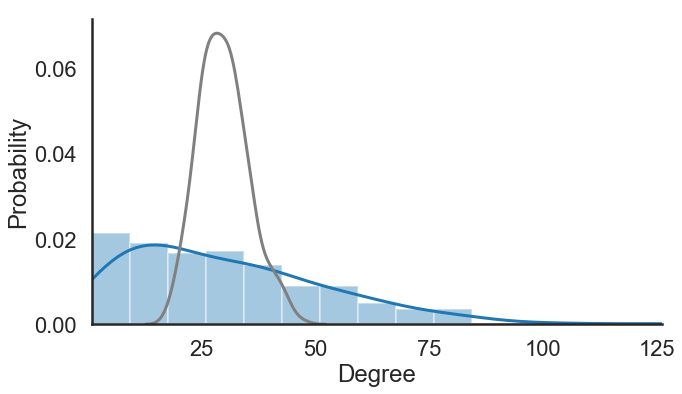

In [7]:
plot_degree_dist(G10)

#### Without the random graph

The random graph is a good sanity check that your degree distribution is not random...but it rather swamps the plot.
So this example allows you to plot only the degree distribution of the real graph, without the random graph.

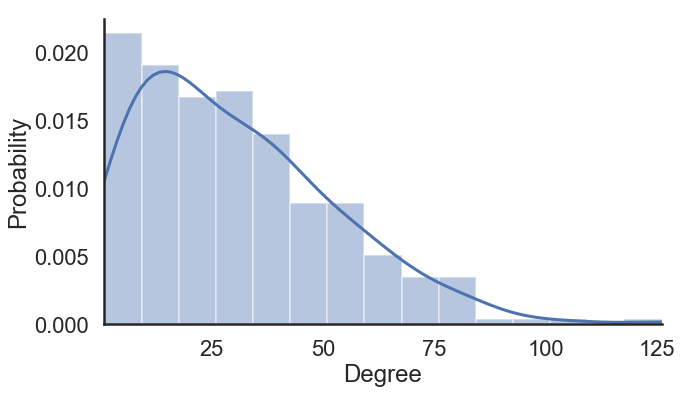

In [8]:
plot_degree_dist(G10, binomial_graph=False)

#### Save the plot

You can save this figure in any location.

You can do that by passing a file name and (optional) directory path to the `figure_name` option. 
If you don't set a directory path the figure will be saved in the local directory.

For this tutorial we'll save the output in a `figures` folder inside this `tutorials` directory.

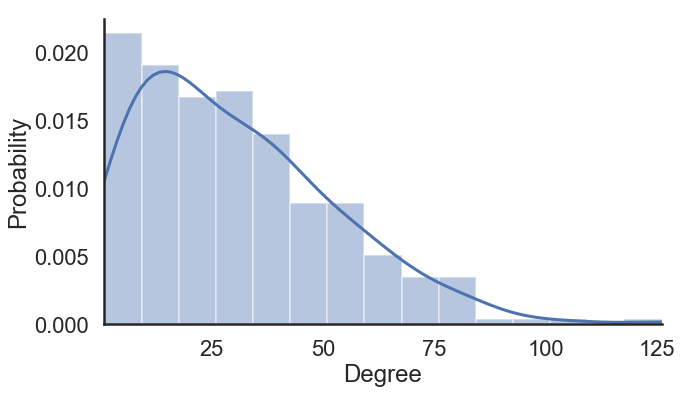

In [9]:
plot_degree_dist(G10, binomial_graph=False, figure_name="figures/DegreeDistribution.png")

☝️ Did you see an error message?

The code checks to see if the directory that you want to save your figure to actually exists.
If it doesn't then it creates the directory, but gives you a little warning first to check that it isn't coming as a surprised (for example if you have tried to save your figure in the wrong place!)

We have the `tutorials/figures` directory specifically ignored in this project so we shouldn't ever see changes there.

Note that if you don't pass a file ending the file will be saved as a `png` by default.

If you add a file extension allowed by `matplotlib` (eg `.jpg`, `.svg`, `.pdf` etc) then the figure will be saved in that format.

#### Change the colours

You can pass a pair of colours to the `plot_degree_dist` function.

The first colour is that of the histogram for the real graph.

The second colour is the line for the Erdős-Rényi graph.

In the example below, we've chosen red and black 🎨

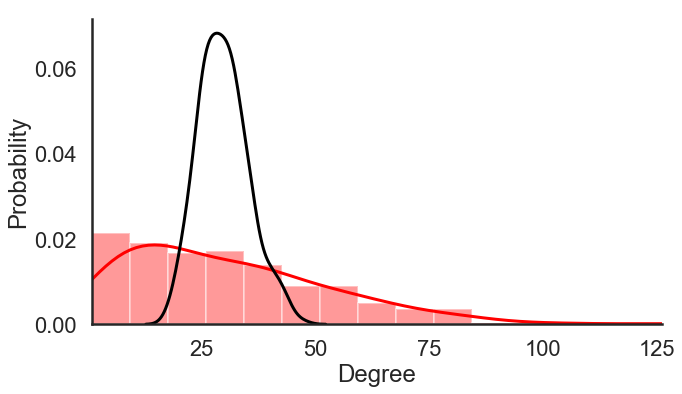

In [10]:
plot_degree_dist(G10, color=["red", "black"])

## Report the global measures of the graph: `report_global_measures`

One of the first things we want to know are how the global attributes of the network compare to those of random networks.

Specifically we'll calculate:

* `a`: assortativity  
* `C`: clustering  
* `E`: efficiency  
* `L`: shortest path  
* `M`: modularity
* `sigma`: small world

and plot a bar chart that compares the real network to the random graphs.

### Calculate the global measures

In [11]:
# Calculate the global measures
bundleGraphs_measures = bundleGraphs.report_global_measures()

# Show the dataframe so we can see the measures
display(bundleGraphs_measures)

,assortativity,average_clustering,average_shortest_path_length,efficiency,modularity
real_graph,0.090769,0.449889,2.376243,0.479840,0.382855
real_graph_R0,-0.080987,0.228016,2.087229,0.518975,0.132774
real_graph_R1,-0.070735,0.233304,2.091480,0.518411,0.123049
real_graph_R2,-0.082525,0.225494,2.089725,0.518731,0.127336
real_graph_R3,-0.085900,0.230025,2.082829,0.519729,0.125386
real_graph_R4,-0.094406,0.225598,2.083654,0.519614,0.129896
real_graph_R5,-0.078434,0.219600,2.082004,0.519828,0.124538
real_graph_R6,-0.092181,0.227093,2.083696,0.519720,0.123882
real_graph_R7,-0.083339,0.240826,2.086700,0.519117,0.122412
real_graph_R8,-0.081700,0.225506,2.085029,0.519518,0.124499


Now you have everything to plot the **network measures** of the BrainNetwork Graph and compare these measures to random measures values obtained from 10 random graphs stored inside the graph bundle `bundleGraphs`. 

### Import the code you need: `plot_network_measures`

In [12]:
# import the function to plot network measures
from scona.visualisations import plot_network_measures

### Plot the measures

There are 2 required parameters for the `plot_network_measures` function:  

1. a `GraphBundle` object (e.g. `bundleGraphs`)
2. the name of the *real graph* in your `GraphBundle` (e.g. `"real_graph"`)

#### Default settings

The default colours are blue and grey, and by default the error bars show 95% confidence intervals.

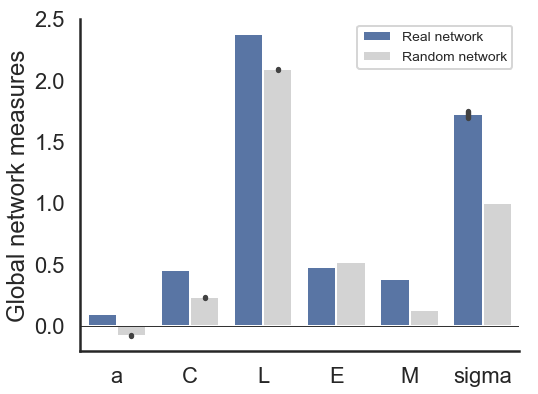

In [13]:
plot_network_measures(bundleGraphs, real_network="real_graph")

#### Save the figure

You'll probably want to save the beautiful figure you've made! 

You can do that by passing a file name and (optional) directory path to the `figure_name` option. 
If you don't set a directory path the figure will be saved in the local directory.

For this tutorial we'll save the output in a `figures` folder inside this `tutorials` directory.

For fun, we'll also adjust the colours to make the real network orange (#FF4400) and the random network turquoise (#00BBFF).

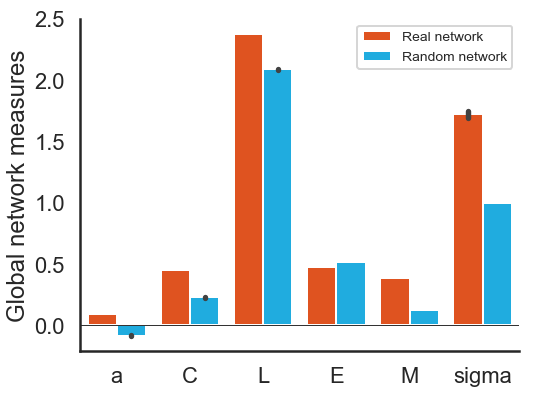

In [14]:
plot_network_measures(bundleGraphs, "real_graph",
                      figure_name="figures/NetworkMeasuresDemo",
                      color=["#FF4400", "#00BBFF"])

#### Hide the legend

You might not want to show the legend.
That's fine!

We'll also use this example to save an `svg` file.

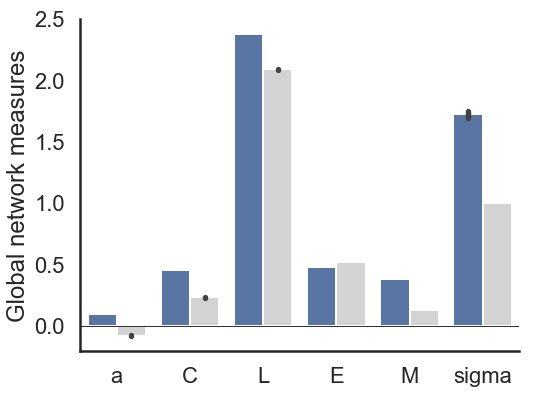

In [15]:
plot_network_measures(bundleGraphs, "real_graph",
                      figure_name="figures/NetworkMeasuresDemoNoLegend.svg",
                      show_legend=False)

#### Only show the real graph

You might not want to show the random graphs.

In this case you have to create a new graph bundle that only contains the real graph, and pass that to the `plot_network_measures` function.

For this example we've also changed the colour to green (to show off 😉).

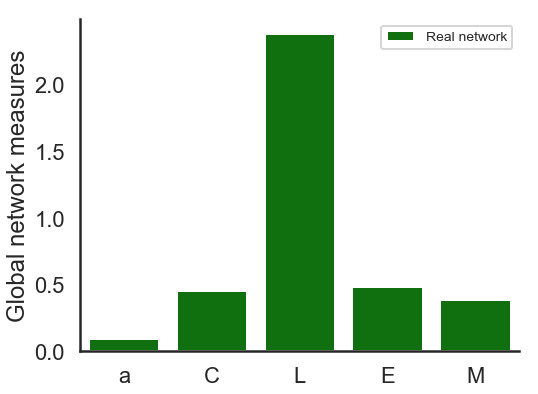

In [16]:
# Create a new graph bundle
realBundle = scn.GraphBundle([G10], ["real_graph"])

plot_network_measures(realBundle, real_network = "real_graph",
                      color=["green"])

#### Change the type of error bars

The variance of measures obtained from random graphs is - by default - shown as the 95% confidence interval.

They're calculated by bootstrapping the random graphs.
There's more information in the [seaborn documentation](https://seaborn.pydata.org/generated/seaborn.barplot.html) if you're curious.

But you don't have to calculate them.
You can plot the standard deviations instead if you'd prefer.
(These are a bit larger than the 95% confidence intervals so they're a bit easier to see in the plot below.)

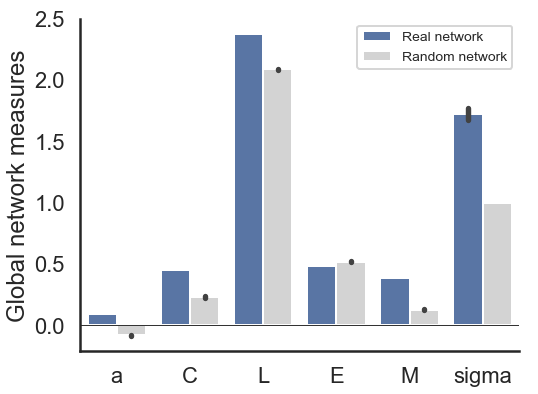

In [17]:
plot_network_measures(bundleGraphs, real_network="real_graph",
                      ci="sd")

Alternatively you could show the 99% confidence interval.

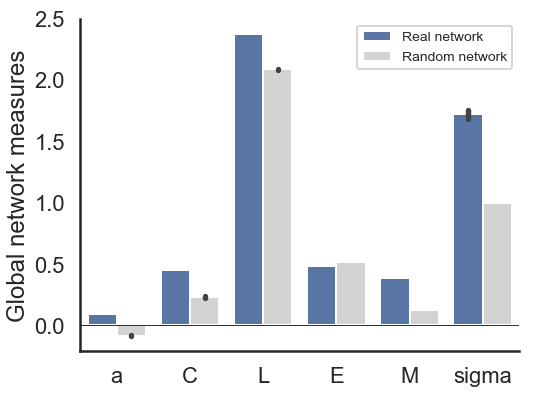

In [18]:
plot_network_measures(bundleGraphs, real_network="real_graph",
                      ci=99)

### Run with 100 random graphs

You can't publish results with 10 random graphs.
These don't give meaningful variations.
So let's add 90 more random graphs.

(This still isn't enough, but much better than 10!
We'd recommend that you run 1000 random graphs for publication quality results.)

This takes some time (around 5 minutes) so the cell below is commented out by default.
Remove the `#` at the start of each of the lines below to run the commands yourself.

In [19]:
#bundleGraphs.create_random_graphs("real_graph", 90)
#print (len(bundleGraphs))

Congratulations! 🎉

You created additional 90 random graphs, to give you a total of 100 random graphs and 1 real graph, and you managed to answer to some of your emails while waiting.

Here's a beautiful plot of your network measures with 95% confidence intervals....which you can't see because the random networks are all so similar to each other 🤦

In [20]:
#plot_network_measures(bundleGraphs, real_network="real_graph")

------------------------------------------------------------------

## *plot_rich_club*
- to plot the rich club values per degree along with the random rich club values created from Random Networks with a preserved degree distribution

Function requries *GraphBundle* object - scona way to handle across-network comparisons. Basically, it is a dictionary, containing *BrainNetwork* objects as values and *strings* (corresponding names of BrainNetwork) as keys.

It is also required to pass the name of the real Graph in GraphBundle (e.g. "Real_Graph") as a string.

Let's create input for the function

In [21]:
print ('Woo')

Woo


In [24]:
# instantiate the GraphBundle object with the BrainNetwork Graph and corresponding name for this Graph

bundleGraphs = scn.GraphBundle([G10], ["real_graph"])

This creates a dictionary-like object with BrainNetwork H keyed by 'Real_Graph'. 

In [4]:
bundleGraphs

{'real_graph': <scona.classes.BrainNetwork at 0x7fc4b42e69b0>,
 'real_graph_R0': <scona.classes.BrainNetwork at 0x7fc4b4293160>,
 'real_graph_R1': <scona.classes.BrainNetwork at 0x7fc4ea394710>,
 'real_graph_R2': <scona.classes.BrainNetwork at 0x7fc4ea394780>,
 'real_graph_R3': <scona.classes.BrainNetwork at 0x7fc4b4293128>,
 'real_graph_R4': <scona.classes.BrainNetwork at 0x7fc4b4293198>,
 'real_graph_R5': <scona.classes.BrainNetwork at 0x7fc4b42930f0>,
 'real_graph_R6': <scona.classes.BrainNetwork at 0x7fc4b4293048>,
 'real_graph_R7': <scona.classes.BrainNetwork at 0x7fc4b4285fd0>,
 'real_graph_R8': <scona.classes.BrainNetwork at 0x7fc4b4285f98>,
 'real_graph_R9': <scona.classes.BrainNetwork at 0x7fc4b4285f60>}

Now add a series of random graphs created by edge swap randomisation of H (keyed by 'Real_Graph').

The *create_random_graphs method* of the GraphBundle class takes in a real network (in our case Real_Graph) and creates a number (10 in the example below) of random graphs. The output is a dictionary of all these graphs.

In [25]:
# Note that 10 is not usually a sufficient number of random graphs to do meaningful analysis,
# it is used here for time considerations
bundleGraphs.create_random_graphs("real_graph", 10)

        Creating 10 random graphs - may take a little while


In [26]:
bundleGraphs

{'real_graph': <scona.classes.BrainNetwork at 0x7f5d9c4a7080>,
 'real_graph_R0': <scona.classes.BrainNetwork at 0x7f5d683fdb38>,
 'real_graph_R1': <scona.classes.BrainNetwork at 0x7f5d68460828>,
 'real_graph_R2': <scona.classes.BrainNetwork at 0x7f5da02c6400>,
 'real_graph_R3': <scona.classes.BrainNetwork at 0x7f5d683fdb70>,
 'real_graph_R4': <scona.classes.BrainNetwork at 0x7f5d683db3c8>,
 'real_graph_R5': <scona.classes.BrainNetwork at 0x7f5d683db240>,
 'real_graph_R6': <scona.classes.BrainNetwork at 0x7f5d9eb85080>,
 'real_graph_R7': <scona.classes.BrainNetwork at 0x7f5da0df8e10>,
 'real_graph_R8': <scona.classes.BrainNetwork at 0x7f5d98be66a0>,
 'real_graph_R9': <scona.classes.BrainNetwork at 0x7f5d98be6ef0>}

Well-done! The required input - GraphBundle is created which contains real network keyed by "Real_Graph" and 10 random graphs. Now, let's plot the **rich club coefficient values** of our BrainNetwork Graph and compare real rich club values to random rich club values obtained from 10 random Graphs (stored inside the GraphBundle).   

In [27]:
# import the function to plot rich club values
from scona.visualisations import plot_rich_club

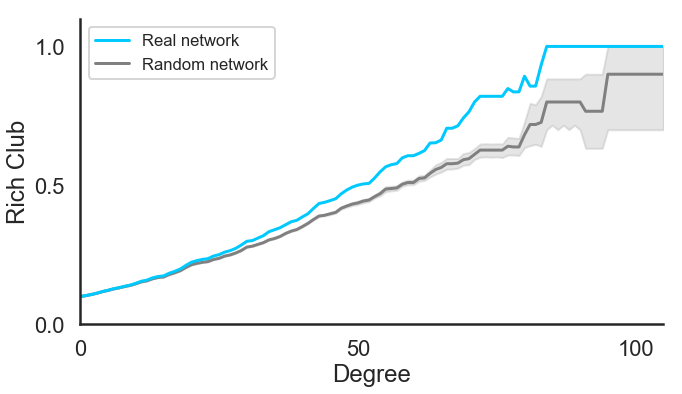

In [28]:
# plot the figure and display without saving to a file
plot_rich_club(bundleGraphs, real_network="real_graph")

In [29]:
# show rich club values for degrees from 55 to 65
rich_club_df = bundleGraphs.report_rich_club()
rich_club_df.iloc[55:66, :]

,real_graph,real_graph_R0,real_graph_R1,real_graph_R2,real_graph_R3,real_graph_R4,real_graph_R5,real_graph_R6,real_graph_R7,real_graph_R8,real_graph_R9
55,0.566783,0.493612,0.468060,0.500581,0.483159,0.499419,0.477352,0.505226,0.499419,0.458769,0.479675
56,0.574390,0.492683,0.471951,0.502439,0.489024,0.502439,0.479268,0.506098,0.496341,0.464634,0.481707
57,0.578205,0.491026,0.476923,0.510256,0.485897,0.503846,0.482051,0.505128,0.500000,0.469231,0.482051
58,0.599099,0.503003,0.492492,0.522523,0.487988,0.516517,0.490991,0.522523,0.504505,0.496997,0.504505
59,0.606723,0.507563,0.494118,0.531092,0.492437,0.522689,0.502521,0.532773,0.507563,0.500840,0.510924
60,0.606723,0.507563,0.494118,0.531092,0.492437,0.522689,0.502521,0.532773,0.507563,0.500840,0.510924
61,0.615054,0.516129,0.503226,0.548387,0.496774,0.535484,0.520430,0.548387,0.535484,0.520430,0.522581
62,0.625287,0.519540,0.503448,0.549425,0.503448,0.540230,0.531034,0.542529,0.535632,0.519540,0.524138
63,0.652422,0.529915,0.524217,0.561254,0.507123,0.575499,0.532764,0.561254,0.558405,0.532764,0.549858
64,0.653333,0.536667,0.530000,0.586667,0.510000,0.600000,0.540000,0.583333,0.576667,0.546667,0.560000


More examples of plotting rich club values:

- save the produced figure in the current directory (where this running python file (or notebook) is located) and set different colors (for real values - #FF4400 - red, for random - #00BBFF - blue).

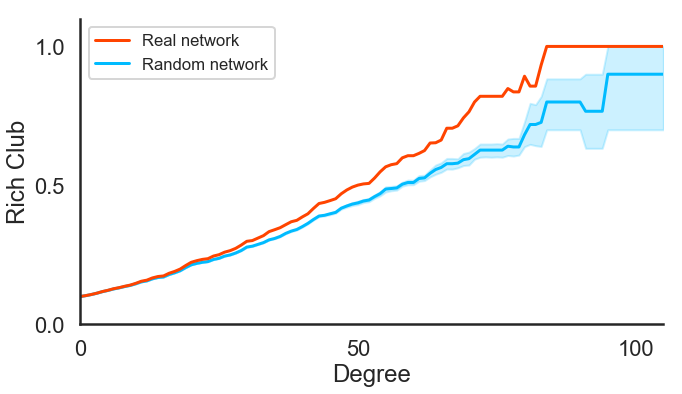

In [30]:
plot_rich_club(bundleGraphs, real_network="real_graph",figure_name="Rich_club_values", color=["#FF4400", "#00BBFF"])

- save the produced figure in the location = figure_name and without the legend.

Please, give your own location (path-to_file) to *figure_name* in order to save a figure.

*Note*: if location does not exist, we will notify you and try to automatically create necessary directories.

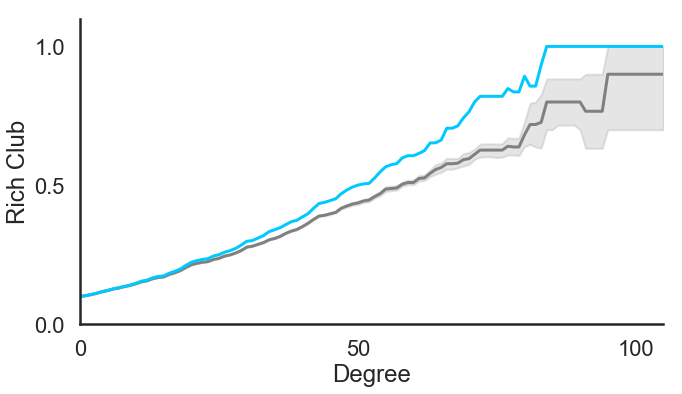

In [38]:
plot_rich_club(bundleGraphs, real_network="real_graph", figure_name="figures/Rich_Club_Values", 
               show_legend=False)

* plot rich club values **only for the real network** (BrainNetwork Graph) and set the color to green.

Simply, do not create random graphs in GraphBundle

In [40]:
realGraph = scn.GraphBundle([G10], ["Real_Graph"])

In [41]:
realGraph

{'Real_Graph': <scona.classes.BrainNetwork at 0x7f5d9c4a7080>}

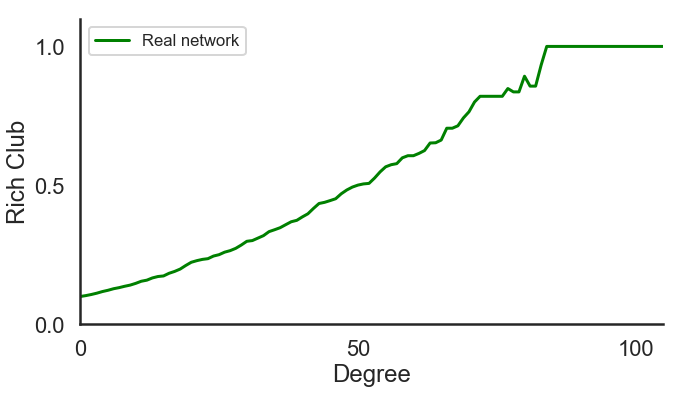

In [42]:
plot_rich_club(realGraph, real_network="Real_Graph", color=["green"])

---------------------------------------------------------

----------------------